# ÁÆÄÊòìÁöÑÂåó‰∫¨Â∏ÇÂú∞ÈìÅÂØºËà™Âõæ

In [1]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# ËØªÂèñÊï∞ÊçÆ
subway_df = pd.read_table('subway', sep=',')

In [3]:
subway_df.head()

line station   dimension  longitude   time
0  1Âè∑Á∫ø     ËãπÊûúÂõ≠  116.411707  39.983603  00:00
1  1Âè∑Á∫ø      Âè§Âüé  116.197072  39.913414  04:58
2  1Âè∑Á∫ø   ÂÖ´ËßíÊ∏∏‰πêÂõ≠  116.219390  39.913076  05:01
3  1Âè∑Á∫ø     ÂÖ´ÂÆùÂ±±  116.242277  39.913185  05:04
4  1Âè∑Á∫ø     ÁéâÊ≥âË∑Ø  116.259470  39.913501  05:06

In [4]:
# Êü•ÁúãÂú∞ÈìÅÊúâÂ§öÂ∞ëÂè∑Á∫ø
def get_subway_lines(subway_df):
    return subway_df['line'].drop_duplicates().tolist()

In [5]:
print(get_subway_lines(subway_df))

['1Âè∑Á∫ø', '2Âè∑Á∫ø', '4Âè∑Á∫ø', '5Âè∑Á∫ø', '6Âè∑Á∫ø', '7Âè∑Á∫ø', '8Âè∑Á∫øÂåó', '8Âè∑Á∫øÂçó', '9Âè∑Á∫ø', '10Âè∑Á∫ø', '13Âè∑Á∫ø', '14Âè∑Á∫øË•ø', '14Âè∑Á∫ø‰∏ú', '15Âè∑Á∫ø', '16Âè∑Á∫ø', 'ÂÖ´ÈÄöÁ∫ø', 'ÊòåÂπ≥Á∫ø', '‰∫¶Â∫ÑÁ∫ø', 'ÊàøÂ±±Á∫ø', 'Êú∫Âú∫Á∫ø', 'S1Á∫ø', 'ÁáïÊàøÁ∫ø', 'Ë•øÈÉäÁ∫ø']


In [6]:
# Â∞ÅË£ÖÂú∞ÈìÅË∑ØÁ∫øÂíåË∑ØÁ∫øÁ´ôÁÇπÊï∞ÊçÆÁªìÊûÑÔºà‰æãÂ¶ÇÔºök=1Âè∑Á∫ø, v=[ËãπÊûúÂõ≠,Âè§Âüé,...]Ôºâ
def get_subway_lines_dict(subway_df):
    subway_lines_dict = {}
    for line in get_subway_lines(subway_df):
        subway_lines_dict[line] = subway_df[subway_df['line'] == line]['station'].tolist()
    return subway_lines_dict

In [7]:
# print(get_subway_lines_dict(subway_df))

In [8]:
# Ëé∑ÂèñÊØè‰∏™Á´ôÁÇπÁöÑ‰ΩçÁΩÆÔºåÂç≥ÁªèÁ∫¨Â∫¶Ôºà‰æãÂ¶ÇÔºök=ËãπÊûúÂõ≠, v=[ÁªèÂ∫¶, Á∫¨Â∫¶]Ôºâ
def get_station_position(subway_df):
    station_position = {}
    subway_data = subway_df.values
    for i in range(len(subway_data)):
        station_position[subway_data[i, 1]] = [subway_data[i, 2], subway_data[i, 3]]
    return station_position

In [9]:
# print(get_station_position(subway_df))

In [10]:
# ÊûÑÈÄ†ÊØè‰∏Ä‰∏™Á´ôÁÇπËøûÊé•ÁöÑ‰∏ã‰∏ÄÁ´ô‰πãÈó¥ÁöÑÂÖ≥Á≥ª
def get_connection_station(subway_df):
    connection_station = {}
    for per_line in get_subway_lines(subway_df):
        line_stations = subway_df[subway_df['line'] == per_line]['station'].tolist()
        for i in range(len(line_stations)):
            per_station = line_stations[i]
            next_stations = []
            if per_station in connection_station.keys():
                next_stations = connection_station[per_station]
            if i - 1 > -1 and line_stations[i - 1] not in next_stations:
                next_stations.append(line_stations[i - 1])
            if i + 1 < len(line_stations) and line_stations[i + 1] not in next_stations:
                next_stations.append(line_stations[i + 1])
            # ‰ΩÜÊòØ10Âè∑Á∫øÊúâÁÇπÁâπÊÆäÔºåÊòØÁéØÂΩ¢Á∫øÔºåÊ≤°ÊúâÁªàÁÇπÁ´ô‰πãÂàÜ„ÄÇÊâÄ‰ª•Ë¶ÅÂØπ10Âè∑Á∫ø‰ΩúÁâπÊÆäÂ§ÑÁêÜ            
            if per_line == '10Âè∑Á∫ø' and per_station == 'Â∑¥Ê≤ü': next_stations.append('ÁÅ´Âô®Ëê•')
            if per_line == '10Âè∑Á∫ø' and per_station == 'ÁÅ´Âô®Ëê•': next_stations.append('Â∑¥Ê≤ü')
            connection_station[per_station] = next_stations
    return connection_station

In [11]:
# print(get_connection_station(subway_df))

In [12]:
%matplotlib inline

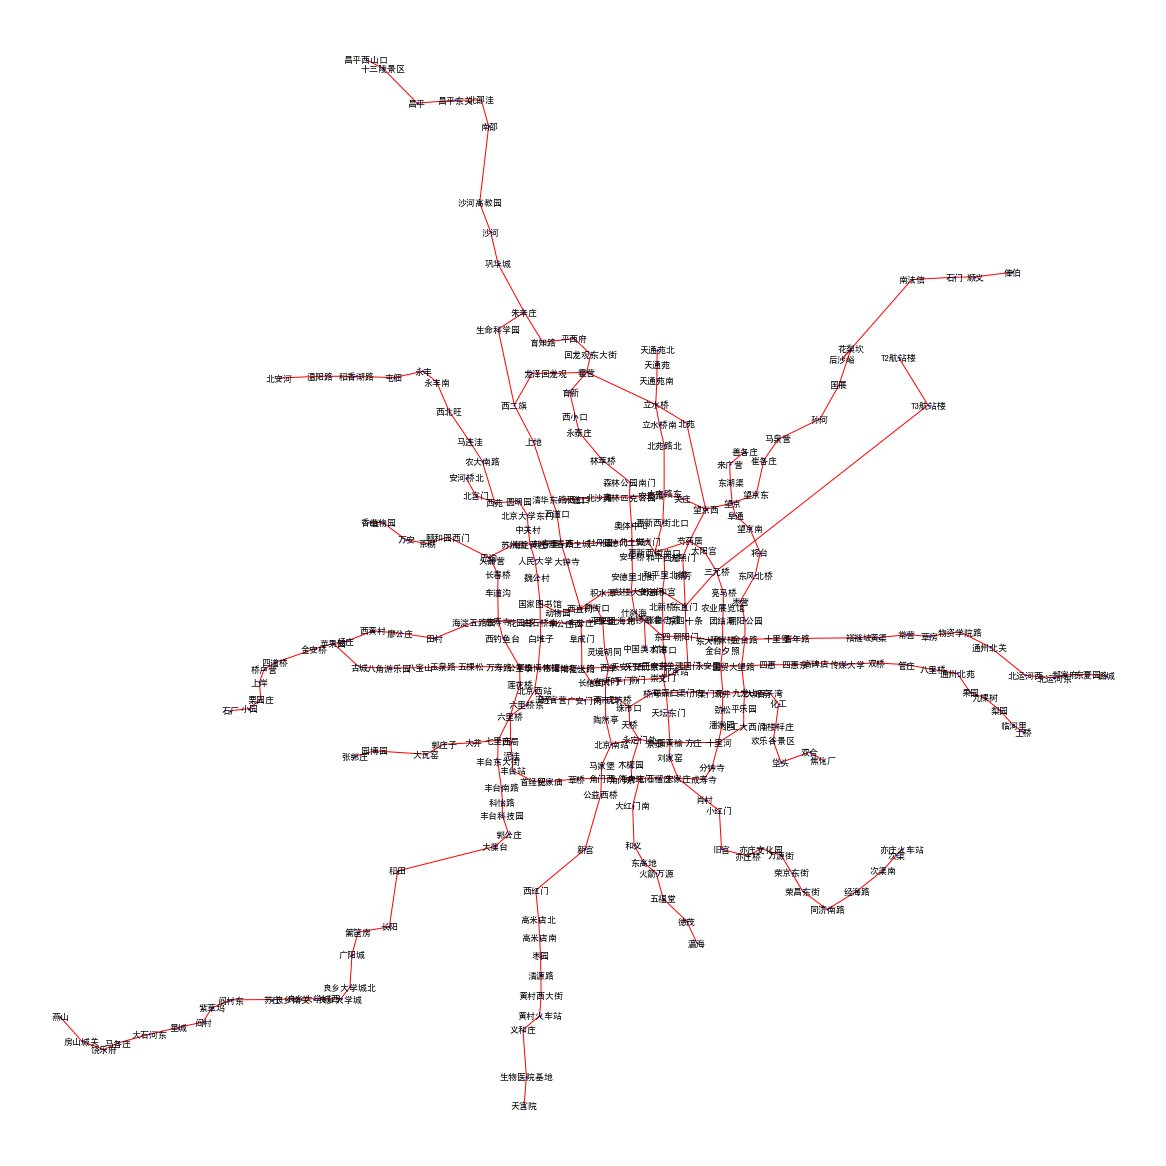

In [13]:
# ÁîªÂá∫Âú∞ÈìÅÁ´ô‰πãÈó¥ÁöÑÂÖ≥Á≥ªÂõæ
G = nx.random_graphs.barabasi_albert_graph(1000, 100)
plt.figure(figsize=(16, 16))
nx.draw(nx.Graph(get_connection_station(subway_df)), get_station_position(subway_df), with_labels=True, node_size=1, 
        node_color = 'b',edge_color = 'r',font_size =9)

In [14]:
# ËÆ°ÁÆó‰∏§Âú∞‰πãÈó¥ÁöÑË∑ùÁ¶ª
def calculate_distance(address_start, address_end):
    station_dict = get_station_position(subway_df)
    dimension_start, longitude_start = station_dict[address_start]
    dimension_end, longitude_end = station_dict[address_end]
    radius = 6371  # km
    dimension_d = math.radians(dimension_end - dimension_start)
    longitude_d = math.radians(longitude_end - longitude_start)
    val_a = (math.sin(dimension_d / 2) * math.sin(dimension_d / 2) +
         math.cos(math.radians(dimension_start)) * math.cos(math.radians(dimension_end)) *
         math.sin(longitude_d / 2) * math.sin(longitude_d / 2))
    return radius * 2 * math.atan2(math.sqrt(val_a), math.sqrt(1 - val_a))

# Êü•ÊâæÁªèËøáÁöÑÂú∞ÈìÅË∑ØÁ∫øÂåÖÊã¨‰∫ÜÈÇ£Âá†Âè∑Á∫ø
def search_lines_by_stations(stations):
    subway_lines = []
    temp = ''
    if len(stations) < 2: return subway_lines
    for i in range(1, len(stations)):
        line = get_connection_line(stations[i-1], stations[i])
        if line and line != temp:
            subway_lines.append(line)
        temp = line
    return subway_lines

# Êü•Êâæ‰∏§‰∏™Âú∞ÈìÅÁ´ô‰πãÈó¥ÁöÑÂú∞ÈìÅË∑ØÁ∫øÊòØÂá†Âè∑Á∫ø
def get_connection_line(station_1, station_2):
    lines_1 = subway_df[subway_df['station'] == station_1]['line'].tolist()
    lines_2 = subway_df[subway_df['station'] == station_2]['line'].tolist()
    for per_line in lines_2:
        if per_line in lines_1:
            # print(per_line, station_2)
            return per_line
    return None

# ÊâìÂç∞Ë∑ØÂæÑ
def print_path_info(stations, paths):
    print('ÁªèËøáÁ´ôÁÇπÔºö\n[{}]'.format(' > üöà> '.join(stations)))
    print('ÊÄªÁ´ôÊï∞Ôºö{}Á´ô'.format(len(stations)))
    print('‰πòÂùêË∑ØÁ∫øÔºö[{}]'.format(' > üöà> '.join(paths)))

## a.Ë∑ØÁ®ãÊúÄÁü≠ÁÆóÊ≥ï

In [15]:
def search_short_distance_path(start_station, end_station):
    # Â§ÑÁêÜ‰∏ãÈù¢Âú®Ëé∑Âèñ‰∏çÂ≠òÂú®keyÊó∂ÂºÇÂ∏∏ÈóÆÈ¢ò
    connection_station = defaultdict(list)
    connection_station.update(get_connection_station(subway_df))
    paths = [[start_station]]
    visited_stations = set()
    # ‰øùÂ≠òÂà∞ËææÊØè‰∏™Á´ôÁÇπÁöÑË∑ØÁ®ãÊúÄÁü≠Ë∑ØÂæÑÔºåkey‰∏∫stationÔºåvalue‰∏∫‰ª•keyÁ´ôÁÇπÁªìÂ∞æÁöÑÊúÄÁü≠path
    short_paths_dict = {}
    short_paths = defaultdict(list)
    short_paths.update(short_paths_dict)
    while paths:
        path = paths.pop(0)
        last_station = path[-1]
        stations = connection_station[last_station]
        for next_station in stations:
            if next_station in visited_stations: continue
            new_path = path + [next_station]
            if short_paths[next_station]:
                old = get_distance(short_paths[next_station])
                new = get_distance(new_path)
                if new < old: short_paths[next_station] = new_path
            else:
                short_paths[next_station] = new_path
            paths.append(new_path)
        visited_stations.add(last_station)
        # ÂçáÂ∫èÊéíÂ∫è
        paths = sorted_by_distance(paths)
    return short_paths[end_station]

# ËÆ°ÁÆó path ÁöÑÈïøÂ∫¶
def get_distance(path):
    distance = 0
    for i in range(1, len(path)):
        distance += calculate_distance(path[i - 1], path[i])
    return distance
        
# Ê†πÊçÆË∑ùÁ¶ªÊúÄÁü≠ÊéíÂ∫è      
def sorted_by_distance(paths):
    if len(paths) < 2: return paths
    # sorted ÂáΩÊï∞ÈªòËÆ§ÊòØÂçáÂ∫è
    return sorted(paths, key=get_distance)

In [16]:
%%time
pass_stations = search_short_distance_path('ÁªèÊµ∑Ë∑Ø', 'ÂåóÂÆâÊ≤≥')

CPU times: user 4min 44s, sys: 1.03 s, total: 4min 45s
Wall time: 4min 46s


In [17]:
pass_paths = search_lines_by_stations(pass_stations)

In [18]:
print_path_info(pass_stations, pass_paths)

ÁªèËøáÁ´ôÁÇπÔºö
[ÁªèÊµ∑Ë∑Ø > üöà> ÂêåÊµéÂçóË∑Ø > üöà> Ëç£Êòå‰∏úË°ó > üöà> Ëç£‰∫¨‰∏úË°ó > üöà> ‰∏áÊ∫êË°ó > üöà> ‰∫¶Â∫ÑÊñáÂåñÂõ≠ > üöà> ‰∫¶Â∫ÑÊ°• > üöà> ÊóßÂÆ´ > üöà> Â∞èÁ∫¢Èó® > üöà> ËÇñÊùë > üöà> ÂÆãÂÆ∂Â∫Ñ > üöà> ÂàòÂÆ∂Á™ë > üöà> Ëí≤ÈªÑÊ¶Ü > üöà> Â§©Âùõ‰∏úÈó® > üöà> Á£ÅÂô®Âè£ > üöà> Â¥áÊñáÈó® > üöà> ‰∏úÂçï > üöà> ÁÅØÂ∏ÇÂè£ > üöà> ‰∏úÂõõ > üöà> ÂçóÈî£ÈºìÂ∑∑ > üöà> ÂåóÊµ∑Âåó > üöà> Âπ≥ÂÆâÈáå > üöà> Êñ∞Ë°óÂè£ > üöà> Ë•øÁõ¥Èó® > üöà> Â§ßÈíüÂØ∫ > üöà> Áü•Êò•Ë∑Ø > üöà> Áü•Êò•Èáå > üöà> Êµ∑Ê∑ÄÈªÑÂ∫Ñ > üöà> ‰∏≠ÂÖ≥Êùë > üöà> Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó® > üöà> ÂúÜÊòéÂõ≠ > üöà> Ë•øËãë > üöà> ÂÜúÂ§ßÂçóË∑Ø > üöà> È©¨ËøûÊ¥º > üöà> Ë•øÂåóÊó∫ > üöà> Ê∞∏‰∏∞Âçó > üöà> Ê∞∏‰∏∞ > üöà> Â±Ø‰ΩÉ > üöà> Á®ªÈ¶ôÊπñË∑Ø > üöà> Ê∏©Èò≥Ë∑Ø > üöà> ÂåóÂÆâÊ≤≥]
ÊÄªÁ´ôÊï∞Ôºö41Á´ô
‰πòÂùêË∑ØÁ∫øÔºö[‰∫¶Â∫ÑÁ∫ø > üöà> 5Âè∑Á∫ø > üöà> 6Âè∑Á∫ø > üöà> 4Âè∑Á∫ø > üöà> 13Âè∑Á∫ø > üöà> 10Âè∑Á∫ø > üöà> 4Âè∑Á∫ø > üöà> 16Âè∑Á∫ø]


## b.‰πòÂùêÁ´ôÁÇπÊúÄÂ∞ë

In [19]:
# ‰πòÂùêÁ´ôÁÇπÊúÄÂ∞ëÁöÑË∑ØÁ∫ø
def search_minor_station_path(start_station, end_station, subway_df):
    # Â§ÑÁêÜ‰∏ãÈù¢Âú®Ëé∑Âèñ‰∏çÂ≠òÂú®keyÊó∂ÂºÇÂ∏∏ÈóÆÈ¢ò
    connection_station = defaultdict(list)
    connection_station.update(get_connection_station(subway_df))
    paths = [[start_station]]
    visited_station = set()
    while paths:
        path = paths.pop(0)
        last_station = path[-1]
        stations = connection_station[last_station]
        for station in stations:
            if station in visited_station: continue
            if station == end_station: return path + [station]
            paths.append(path + [station])
        visited_station.add(last_station)
        # Ê†πÊçÆÈïøÂ∫¶ÊéíÂ∫è
        paths = sorted(paths, key=len)

In [20]:
%%time
# ÊµãËØï  
pass_stations = search_minor_station_path('ÁªèÊµ∑Ë∑Ø', 'ÂåóÂÆâÊ≤≥', subway_df)

CPU times: user 31.7 ms, sys: 964 ¬µs, total: 32.7 ms
Wall time: 32.1 ms


In [21]:
pass_paths = search_lines_by_stations(pass_stations)

In [22]:
print_path_info(pass_stations, pass_paths)

ÁªèËøáÁ´ôÁÇπÔºö
[ÁªèÊµ∑Ë∑Ø > üöà> ÂêåÊµéÂçóË∑Ø > üöà> Ëç£Êòå‰∏úË°ó > üöà> Ëç£‰∫¨‰∏úË°ó > üöà> ‰∏áÊ∫êË°ó > üöà> ‰∫¶Â∫ÑÊñáÂåñÂõ≠ > üöà> ‰∫¶Â∫ÑÊ°• > üöà> ÊóßÂÆ´ > üöà> Â∞èÁ∫¢Èó® > üöà> ËÇñÊùë > üöà> ÂÆãÂÆ∂Â∫Ñ > üöà> ÂàòÂÆ∂Á™ë > üöà> Ëí≤ÈªÑÊ¶Ü > üöà> Â§©Âùõ‰∏úÈó® > üöà> Á£ÅÂô®Âè£ > üöà> Â¥áÊñáÈó® > üöà> ‰∏úÂçï > üöà> ÁÅØÂ∏ÇÂè£ > üöà> ‰∏úÂõõ > üöà> ÂçóÈî£ÈºìÂ∑∑ > üöà> ÂåóÊµ∑Âåó > üöà> Âπ≥ÂÆâÈáå > üöà> Êñ∞Ë°óÂè£ > üöà> Ë•øÁõ¥Èó® > üöà> Â§ßÈíüÂØ∫ > üöà> Áü•Êò•Ë∑Ø > üöà> Áü•Êò•Èáå > üöà> Êµ∑Ê∑ÄÈªÑÂ∫Ñ > üöà> ‰∏≠ÂÖ≥Êùë > üöà> Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó® > üöà> ÂúÜÊòéÂõ≠ > üöà> Ë•øËãë > üöà> ÂÜúÂ§ßÂçóË∑Ø > üöà> È©¨ËøûÊ¥º > üöà> Ë•øÂåóÊó∫ > üöà> Ê∞∏‰∏∞Âçó > üöà> Ê∞∏‰∏∞ > üöà> Â±Ø‰ΩÉ > üöà> Á®ªÈ¶ôÊπñË∑Ø > üöà> Ê∏©Èò≥Ë∑Ø > üöà> ÂåóÂÆâÊ≤≥]
ÊÄªÁ´ôÊï∞Ôºö41Á´ô
‰πòÂùêË∑ØÁ∫øÔºö[‰∫¶Â∫ÑÁ∫ø > üöà> 5Âè∑Á∫ø > üöà> 6Âè∑Á∫ø > üöà> 4Âè∑Á∫ø > üöà> 13Âè∑Á∫ø > üöà> 10Âè∑Á∫ø > üöà> 4Âè∑Á∫ø > üöà> 16Âè∑Á∫ø]


## c.Êç¢‰πòË∑ØÁ∫øÊúÄÂ∞ë

In [23]:
# ÊûÑÂª∫Âú∞ÈìÅÊç¢‰πòË∑ØÁ∫øÂõæÔºö
def subway_lines_map(subway_df):
    subway_lines_dict = {}
    subway_lines = defaultdict(list)
    subway_lines.update(subway_lines_dict)
    all_stations = subway_df['station'].drop_duplicates().tolist()
    for station in all_stations:
        lines = subway_df[subway_df['station'] == station]['line'].tolist()
        if len(lines) > 1:
            for i in range(len(lines)):
                if lines[i] not in subway_lines.keys():
                    subway_lines[lines[i]] = lines[:i] + lines[i+1:]
                else:
                    s = set(subway_lines[lines[i]] + lines[:i] + lines[i+1:])
                    subway_lines[lines[i]] = list(s)
    return subway_lines

In [24]:
connection_subway_lines = subway_lines_map(subway_df)

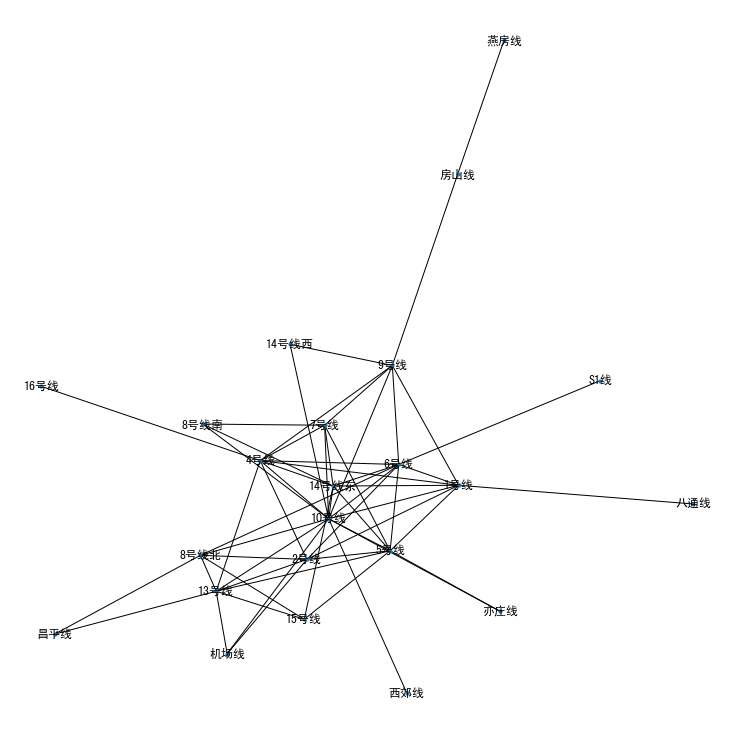

In [25]:
# ÁîªÂá∫Âú∞ÈìÅÁ´ô‰πãÈó¥ÁöÑÂÖ≥Á≥ªÂõæ
G = nx.random_graphs.barabasi_albert_graph(100, 10)
plt.figure(figsize=(10, 10))
nx.draw(nx.Graph(connection_subway_lines), with_labels=True, node_size=10)

In [26]:
print(connection_subway_lines)

defaultdict(<class 'list'>, {'1Âè∑Á∫ø': ['2Âè∑Á∫ø', '14Âè∑Á∫ø‰∏ú', '5Âè∑Á∫ø', '9Âè∑Á∫ø', 'ÂÖ´ÈÄöÁ∫ø', '6Âè∑Á∫ø', '10Âè∑Á∫ø', '4Âè∑Á∫ø'], '6Âè∑Á∫ø': ['2Âè∑Á∫ø', '14Âè∑Á∫ø‰∏ú', 'S1Á∫ø', '5Âè∑Á∫ø', '9Âè∑Á∫ø', '1Âè∑Á∫ø', '8Âè∑Á∫øÂåó', '10Âè∑Á∫ø', '4Âè∑Á∫ø'], '10Âè∑Á∫ø': ['8Âè∑Á∫øÂçó', '‰∫¶Â∫ÑÁ∫ø', '5Âè∑Á∫ø', '9Âè∑Á∫ø', 'Ë•øÈÉäÁ∫ø', '14Âè∑Á∫øË•ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '8Âè∑Á∫øÂåó', 'Êú∫Âú∫Á∫ø', '7Âè∑Á∫ø', '14Âè∑Á∫ø‰∏ú', '4Âè∑Á∫ø', '13Âè∑Á∫ø'], '9Âè∑Á∫ø': ['14Âè∑Á∫øË•ø', 'ÊàøÂ±±Á∫ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '7Âè∑Á∫ø', '10Âè∑Á∫ø', '4Âè∑Á∫ø'], '2Âè∑Á∫ø': ['5Âè∑Á∫ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '8Âè∑Á∫øÂåó', 'Êú∫Âú∫Á∫ø', '4Âè∑Á∫ø', '13Âè∑Á∫ø'], '4Âè∑Á∫ø': ['2Âè∑Á∫ø', '9Âè∑Á∫ø', '10Âè∑Á∫ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '16Âè∑Á∫ø', '7Âè∑Á∫ø', '14Âè∑Á∫ø‰∏ú', '13Âè∑Á∫ø'], '5Âè∑Á∫ø': ['2Âè∑Á∫ø', '‰∫¶Â∫ÑÁ∫ø', '15Âè∑Á∫ø', '10Âè∑Á∫ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '7Âè∑Á∫ø', '14Âè∑Á∫ø‰∏ú', '13Âè∑Á∫ø'], '14Âè∑Á∫ø‰∏ú': ['8Âè∑Á∫øÂçó', '5Âè∑Á∫ø', '15Âè∑Á∫ø', '6Âè∑Á∫ø', '1Âè∑Á∫ø', '7Âè∑Á∫ø', '10Âè∑Á∫ø', '4Âè∑Á∫ø'], 'ÂÖ´ÈÄöÁ∫ø': 

In [27]:
# Êç¢‰πòÂú∞ÈìÅË∑ØÁ∫øÊúÄÂ∞ë
def search_minor_line_path(start_station, end_station):
    line_means = []
    start_lines = subway_df[subway_df['station'] == start_station]['line'].tolist()
    end_lines = subway_df[subway_df['station'] == end_station]['line'].tolist()
    line_means = [search_minor_lines(s_line, e_line) for s_line in start_lines for e_line in end_lines]
    line_means = sorted(line_means, key=len)
    lines = line_means[0]
    return lines

# Á∫øË∑ØÁõ¥Êé•Êç¢‰πòÊúÄÂ∞ëË∑ØÁ∫ø
def search_minor_lines(start_line, end_line):
    # Â§ÑÁêÜ‰∏ãÈù¢Âú®Ëé∑Âèñ‰∏çÂ≠òÂú®keyÊó∂ÂºÇÂ∏∏ÈóÆÈ¢ò
    connection_line = defaultdict(list)
    connection_line.update(connection_subway_lines)
    paths = [[start_line]]
    visited_lines = set()
    while paths:
        path = paths.pop(0)
        last_line = path[-1]
        lines = connection_line[last_line]
        for line in lines:
            if line in visited_lines: continue
            if line == end_line: return path + [line]
            paths.append(path + [line])
        visited_lines.add(last_line)
        # Ê†πÊçÆÈïøÂ∫¶ÊéíÂ∫è
        paths = sorted(paths, key=len)

# Ê†πÊçÆÊç¢‰πòÁöÑË∑ØÁ∫øËÆ°ÁÆóÁªèËøáÁöÑÁ´ôÁÇπ
def get_stations_by_lines(start_station, end_station, lines):
    stations = [start_station]
    def get_change_station(line_1, line_2):
        res = []
        for i in subway_df[subway_df['line'] == line_1]['station'].tolist():
            for j in subway_df[subway_df['line'] == line_2]['station'].tolist():
                if i == j: res.append(i)
        return res[-1]
        
    # È¶ñÂÖàÊ±ÇÂá∫ÂêÑÁ∫øË∑ØÁöÑÊç¢‰πòÁ´ô
    change_stations = [start_station]
    for i in range(1, len(lines)):
        change_stations.append(get_change_station(lines[i-1], lines[i]))
    change_stations.append(end_station)
    for j in range(1, len(change_stations)):
        stations += get_stations_two_station(change_stations[j-1], change_stations[j])[1:]
    return stations

def get_stations_two_station(station_1, station_2):
    line = get_connection_line(station_1, station_2)
    line_df = subway_df[subway_df['line'] == line]
    return search_minor_station_path(station_1, station_2, line_df)

In [28]:
%%time
pass_paths = search_minor_line_path('ÁªèÊµ∑Ë∑Ø', 'Âåó‰∫¨Ë•øÁ´ô')

CPU times: user 1.55 ms, sys: 43 ¬µs, total: 1.59 ms
Wall time: 1.56 ms


In [29]:
pass_stations = get_stations_by_lines('ÁªèÊµ∑Ë∑Ø', 'Âåó‰∫¨Ë•øÁ´ô', pass_paths)

In [30]:
print_path_info(pass_stations, pass_paths)

ÁªèËøáÁ´ôÁÇπÔºö
[ÁªèÊµ∑Ë∑Ø > üöà> ÂêåÊµéÂçóË∑Ø > üöà> Ëç£Êòå‰∏úË°ó > üöà> Ëç£‰∫¨‰∏úË°ó > üöà> ‰∏áÊ∫êË°ó > üöà> ‰∫¶Â∫ÑÊñáÂåñÂõ≠ > üöà> ‰∫¶Â∫ÑÊ°• > üöà> ÊóßÂÆ´ > üöà> Â∞èÁ∫¢Èó® > üöà> ËÇñÊùë > üöà> ÂÆãÂÆ∂Â∫Ñ > üöà> ÂàòÂÆ∂Á™ë > üöà> Ëí≤ÈªÑÊ¶Ü > üöà> Â§©Âùõ‰∏úÈó® > üöà> Á£ÅÂô®Âè£ > üöà> Ê°•Êπæ > üöà> Áè†Â∏ÇÂè£ > üöà> ËôéÂùäÊ°• > üöà> ËèúÂ∏ÇÂè£ > üöà> ÂπøÂÆâÈó®ÂÜÖ > üöà> ËææÂÆòËê• > üöà> ÊπæÂ≠ê > üöà> Âåó‰∫¨Ë•øÁ´ô]
ÊÄªÁ´ôÊï∞Ôºö23Á´ô
‰πòÂùêË∑ØÁ∫øÔºö[‰∫¶Â∫ÑÁ∫ø > üöà> 5Âè∑Á∫ø > üöà> 7Âè∑Á∫ø]


# Machine Learning

## 0. Re-code the house price machine learning

In [31]:
from sklearn.datasets import load_boston

In [32]:
data = load_boston()

In [33]:
X = data['data']
y = data['target']

In [34]:
print(X[0],y[0])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


In [35]:
X.shape

(506, 13)

In [36]:
len(y)

506

In [37]:
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

In [39]:
def plot_figure(X, y):
    size = len(X[0]) 
    fig = plt.figure(figsize=(20, 10), dpi=100)
    for i in range(1,size+1):
        ax = fig.add_subplot(3,5,i)
        ax.scatter(X[:,i-1], y)
        ax.set_xlabel('X[' + str(i-1) + ']')
        ax.set_ylabel('y')
    plt.show()

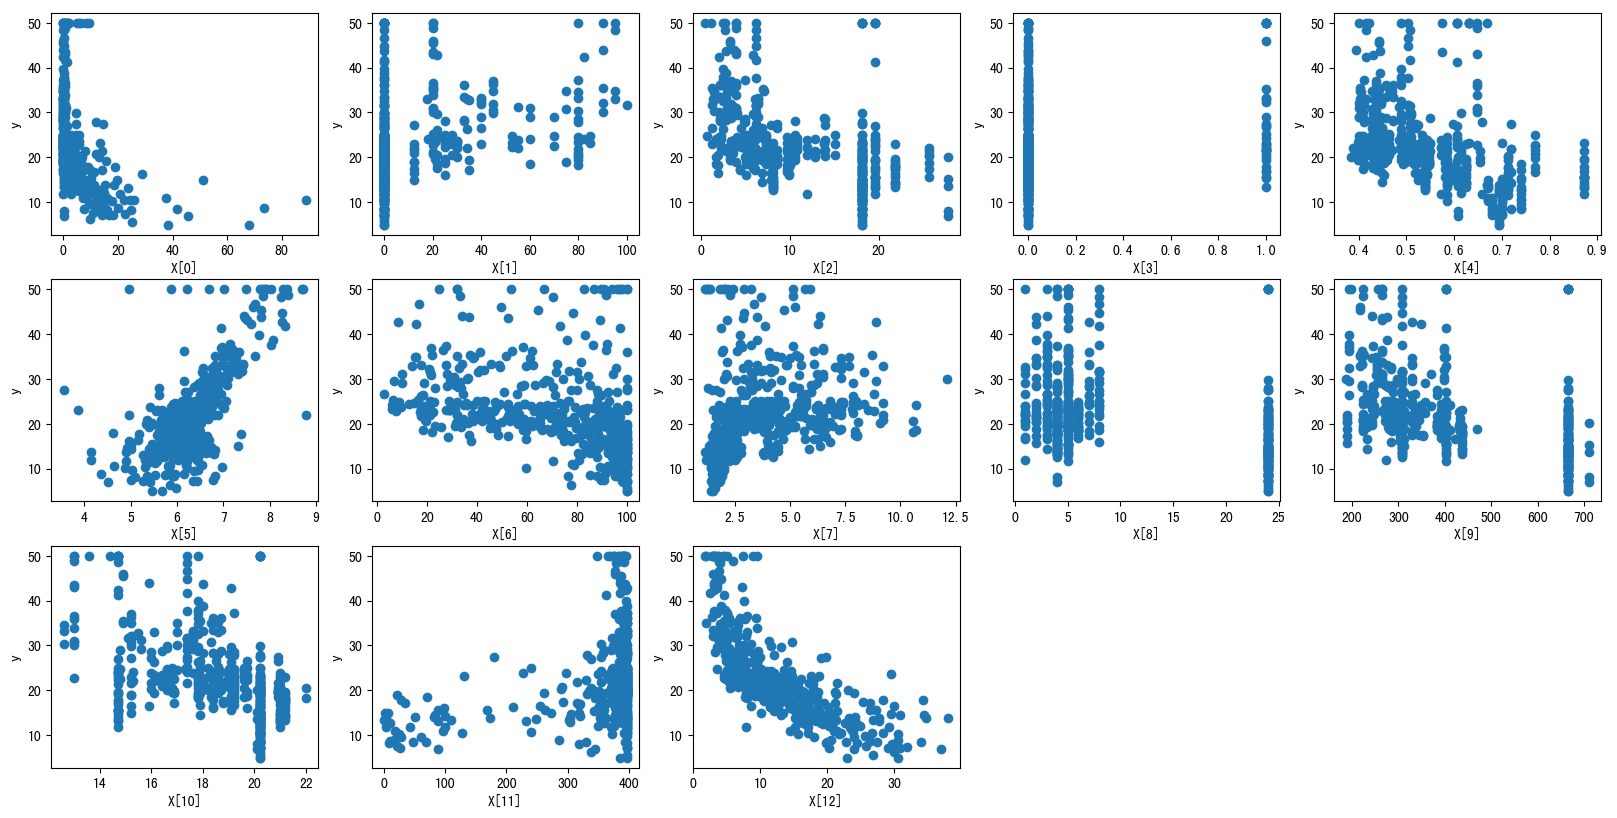

In [40]:
plot_figure(X, y)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# ÂØπÊï∞ÊçÆÊãÜÂàÜÔºåÂêåÊó∂Ëøô‰∏™ÂáΩÊï∞Ëøò‰ºöÊâì‰π±Êï∞ÊçÆÈ°∫Â∫è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
X_train.shape

(354, 13)

### ÂÆö‰πâlossÂáΩÊï∞
 $ÂÖ¨Âºè‰∏ÄÔºö loss_1= {1\over n} \sum_{i=1}^n |y_i - \hat{y_i}| $ $$$$
 $ÂÖ¨Âºè‰∫åÔºö loss_2= {1\over n} \sum_{i=1}^n (y_i - \hat{y_i})^2 $

In [44]:
def loss_1(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [45]:
def loss_2(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [46]:
import random

In [47]:
X_rm = X_train[:, 5]
rand_range = 100
k = random.randint(-rand_range, rand_range)
b = random.randint(-rand_range, rand_range)

In [48]:
y_rm = k * X_rm + b

In [49]:
loss1 = loss_1(y_rm, y_train)
loss2 = loss_2(y_rm, y_train)
print('loss_1: {}'.format(loss1))
print('loss_2: {}'.format(loss2))

loss_1: 234.54968644067802
loss_2: 55933.79844579377


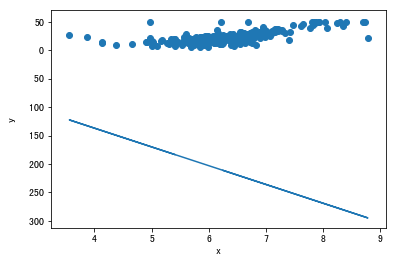

In [50]:
plt.plot(X_rm, y_rm)
plt.scatter(X_rm, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

nums:0, loss:97.92
nums:3, loss:12.03
nums:31, loss:7.63
nums:59, loss:6.45
nums:215, loss:4.83
nums:383, loss:4.55
The best k is 9, the best b is -76


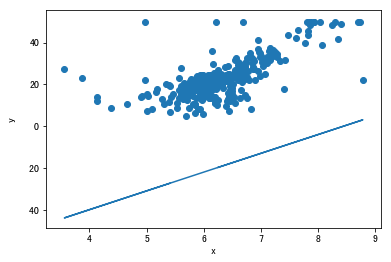

In [89]:
nums = 0
k, b = 0, 0
min_loss = 999999
while nums < 2000:
    k = random.randint(-rand_range, rand_range)
    b = random.randint(-rand_range, rand_range)
    y_rm = k * X_rm + b
    loss1 = loss_1(y_rm, y_train)
    if loss1 < min_loss:
        min_loss = loss1
        print('nums:{}, loss:{:.2f}'.format(nums, loss1))
    nums += 1
print('The best k is {}, the best b is {}'.format(k, b))
plt.plot(X_rm, y_rm)
plt.scatter(X_rm, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Second-Method: Supervised Direction to get optimal k and b

The best k is -7, the best b is 64. min_loss is 9.1836


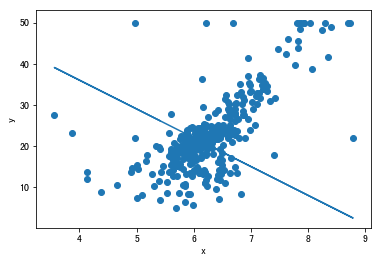

In [52]:
nums = 0
best_k = random.randint(-rand_range, rand_range)
best_b = random.randint(-rand_range, rand_range)
min_loss = 999999
direction = [(0,1),(0,-1),(1,0),(-1,0)]
weight = 1
while nums < 1000:
    for (d_k, d_b) in direction:
        k = best_k + d_k * weight
        b = best_b + d_b * weight
        y_sd = k * X_rm + b
        loss1 = loss_1(y_sd, y_train)
        if loss1 < min_loss:
            best_k = k
            best_b = b
            min_loss = loss1
#     print('nums:{}, loss:{:.2f}'.format(nums, loss1))
    nums += 1
y_sd = best_k * X_rm + best_b
print('The best k is {}, the best b is {}. min_loss is {:.4f}'.format(best_k, best_b, min_loss))
plt.plot(X_rm, y_sd)
plt.scatter(X_rm, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Third-Method: Gradient Descent to get optimal k and b
$\frac{\partial}{\partial\theta}J(\theta)=X^T(X\theta-Y)$ $$$$
$\theta:=\theta-\alpha\frac{\partial}{\partial\theta}J(\theta)=\alpha X^T(X\theta-Y)$

In [53]:
# Ê†πÊçÆÂÖ¨ÂºèËøõË°åÊ¢ØÂ∫¶‰∏ãÈôç
def gradient_descent(x, y, k, b, LR):
    dlta_k = sum(x_i * (x_i * k + b - y_i) for x_i, y_i in zip(list(x), list(y))) / len(list(y))
    dlta_b = sum((x_i * k + b - y_i) for x_i, y_i in zip(list(x), list(y))) / len(list(y))
    return k - LR * dlta_k, b - LR * dlta_b

nums:0, k:9.685327262457626, b:9.949896807909605, loss:2201.77
nums:10, k:7.1652589314516595, b:9.547578872504136, loss:963.82
nums:20, k:5.504195904958542, b:9.280575249162904, loss:438.43
nums:30, k:4.409427990417284, b:9.102777156341467, loss:218.42
nums:40, k:3.6879873908137126, b:8.983787599908231, loss:128.29
nums:50, k:3.212661007217799, b:8.903567506573896, loss:92.74
nums:60, k:2.89958421149203, b:8.848906212914699, loss:79.68
nums:70, k:2.693469647918952, b:8.811094652111235, loss:75.57
nums:80, k:2.5578693911933037, b:8.784391413414447, loss:74.83
nums:90, k:2.468755320567747, b:8.765011499171779, loss:75.19
nums:100, k:2.4102870121563766, b:8.750459667724447, loss:75.80
nums:110, k:2.3720217421403094, b:8.739090942895121, loss:76.36
nums:120, k:2.3470751947006874, b:8.72982088196588, loss:76.80
nums:130, k:2.3309089175044773, b:8.721934571225885, loss:77.12
nums:140, k:2.3205309575222897, b:8.714960707198042, loss:77.35
nums:150, k:2.313968884007522, b:8.708588585288842, lo

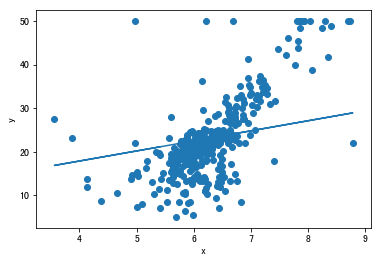

In [91]:
LR = 0.001
# ÂàùÂßãËØùÂèÇÊï∞ kÔºåb
k = b = 10
# Ëø≠‰ª£Ê¨°Êï∞
nums = 0
while nums < 300:
    k, b = gradient_descent(X_rm, y_train, k, b, LR)
    y_sd = k * X_rm + b
    loss2 = loss_2(y_sd, y)
    if nums % 10 == 0:
        print('nums:{}, k:{}, b:{}, loss:{:.2f}'.format(nums, k, b, loss2))
    nums += 1
y_sd = k * X_rm + b
plt.plot(X_rm, y_sd)
plt.scatter(X_rm, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fourth-Method: Try different Loss function and learning rate

LR=0.001, k=2.415085164488035, b=8.751749629937597
LR=0.01, k=2.3689938678248663, b=8.266354628059593
LR=0.03, k=2.529487840917735, b=7.247498343507927
LR=0.04, k=2.6082957528325994, b=6.7472058105266886
LR=0.048, k=2.786368768041382, b=6.369517628975155
LR=0.0485, k=3.62480959391652, b=6.476362899594474
LR=0.0486, k=4.1156256050361435, b=6.548634059887726
LR=0.0488, k=5.968690276244656, b=6.830449466580835


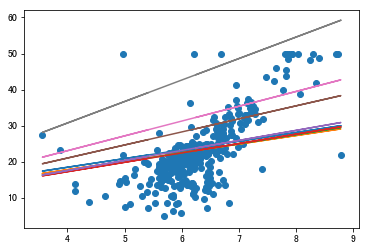

In [125]:
LR = [0.001, 0.01, 0.03, 0.04, 0.048, 0.0485, 0.0486, 0.0488]
for lr in LR:
    # ÂàùÂßãËØùÂèÇÊï∞ kÔºåb
    k = b = 10
    # Ëø≠‰ª£Ê¨°Êï∞
    nums = 0
    while nums < 100:
        k, b = gradient_descent(X_rm, y_train, k, b, lr)
        y_sd = k * X_rm + b
        loss2 = loss_2(y_sd, y)
        nums += 1
    y_sd = k * X_rm + b
    print('LR={}, k={}, b={}'.format(lr, k, b))
    plt.plot(X_rm, y_sd)
plt.scatter(X_rm, y_train)
plt.show()

## 2. Answer following questions
    
    2.1 Why do we need machine learning methods instead of creating a complicated formula?
    Ans: Because we can't get a complex formula to fit the data directly.

    2.2 What's the disadvantages of the 1st Random Choosen methods in our course?
    Ans: This method is very inefficient and can not obtain the optimal solution.

    2.3 Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
    Ans: This method is slightly better than the first. But this method is influenced by the initial value of parameters.

    2.4 Why do we use Derivative / Gredient to fit a target function?
    Ans: Because Derivative or Gredient reflects the rate of change of the function.

    2.5 In the words 'Gredient Descent', what's the Gredient and what's the Descent?
    Ans: The Gredient is the derivative of a function at some point. The descent is the direction along which the gradient decreases.
    
    2.6 What's the advantages of the 3rd gradient descent method compared to the previous methods?
    Ans: This method can get the optimal solution quickly.

    2.7 Using the simple words to describe: What's the machine leanring.
    Ans: Machine learning is a complicated function that represents the relationship between input data and output data.